# FRQI Encoding and Decoding Demo
This notebook demonstrates encoding and decoding a selected MNIST image using the FRQI method. It displays the quantum circuit and a frequency vs. pixel state plot.

In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(''), '../..')))
import numpy as np
import matplotlib.pyplot as plt
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from frqi.website.preprocess import load_and_process_image
from frqi.website.build_circuit import build_circuit

In [20]:
# Select image index and number of shots
image_index = 1  # Change this to select a different image
shots = 1024

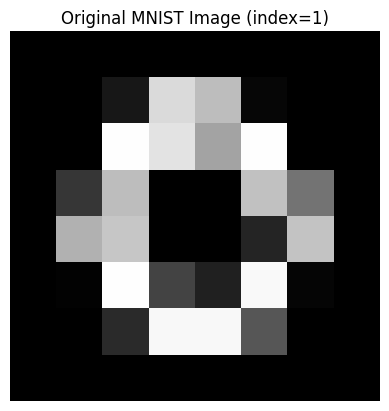

In [21]:
# Load the image and angles
images, angles = load_and_process_image(image_index)
image = images[image_index]
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(f'Original MNIST Image (index={image_index})')
plt.axis('off')
plt.show()

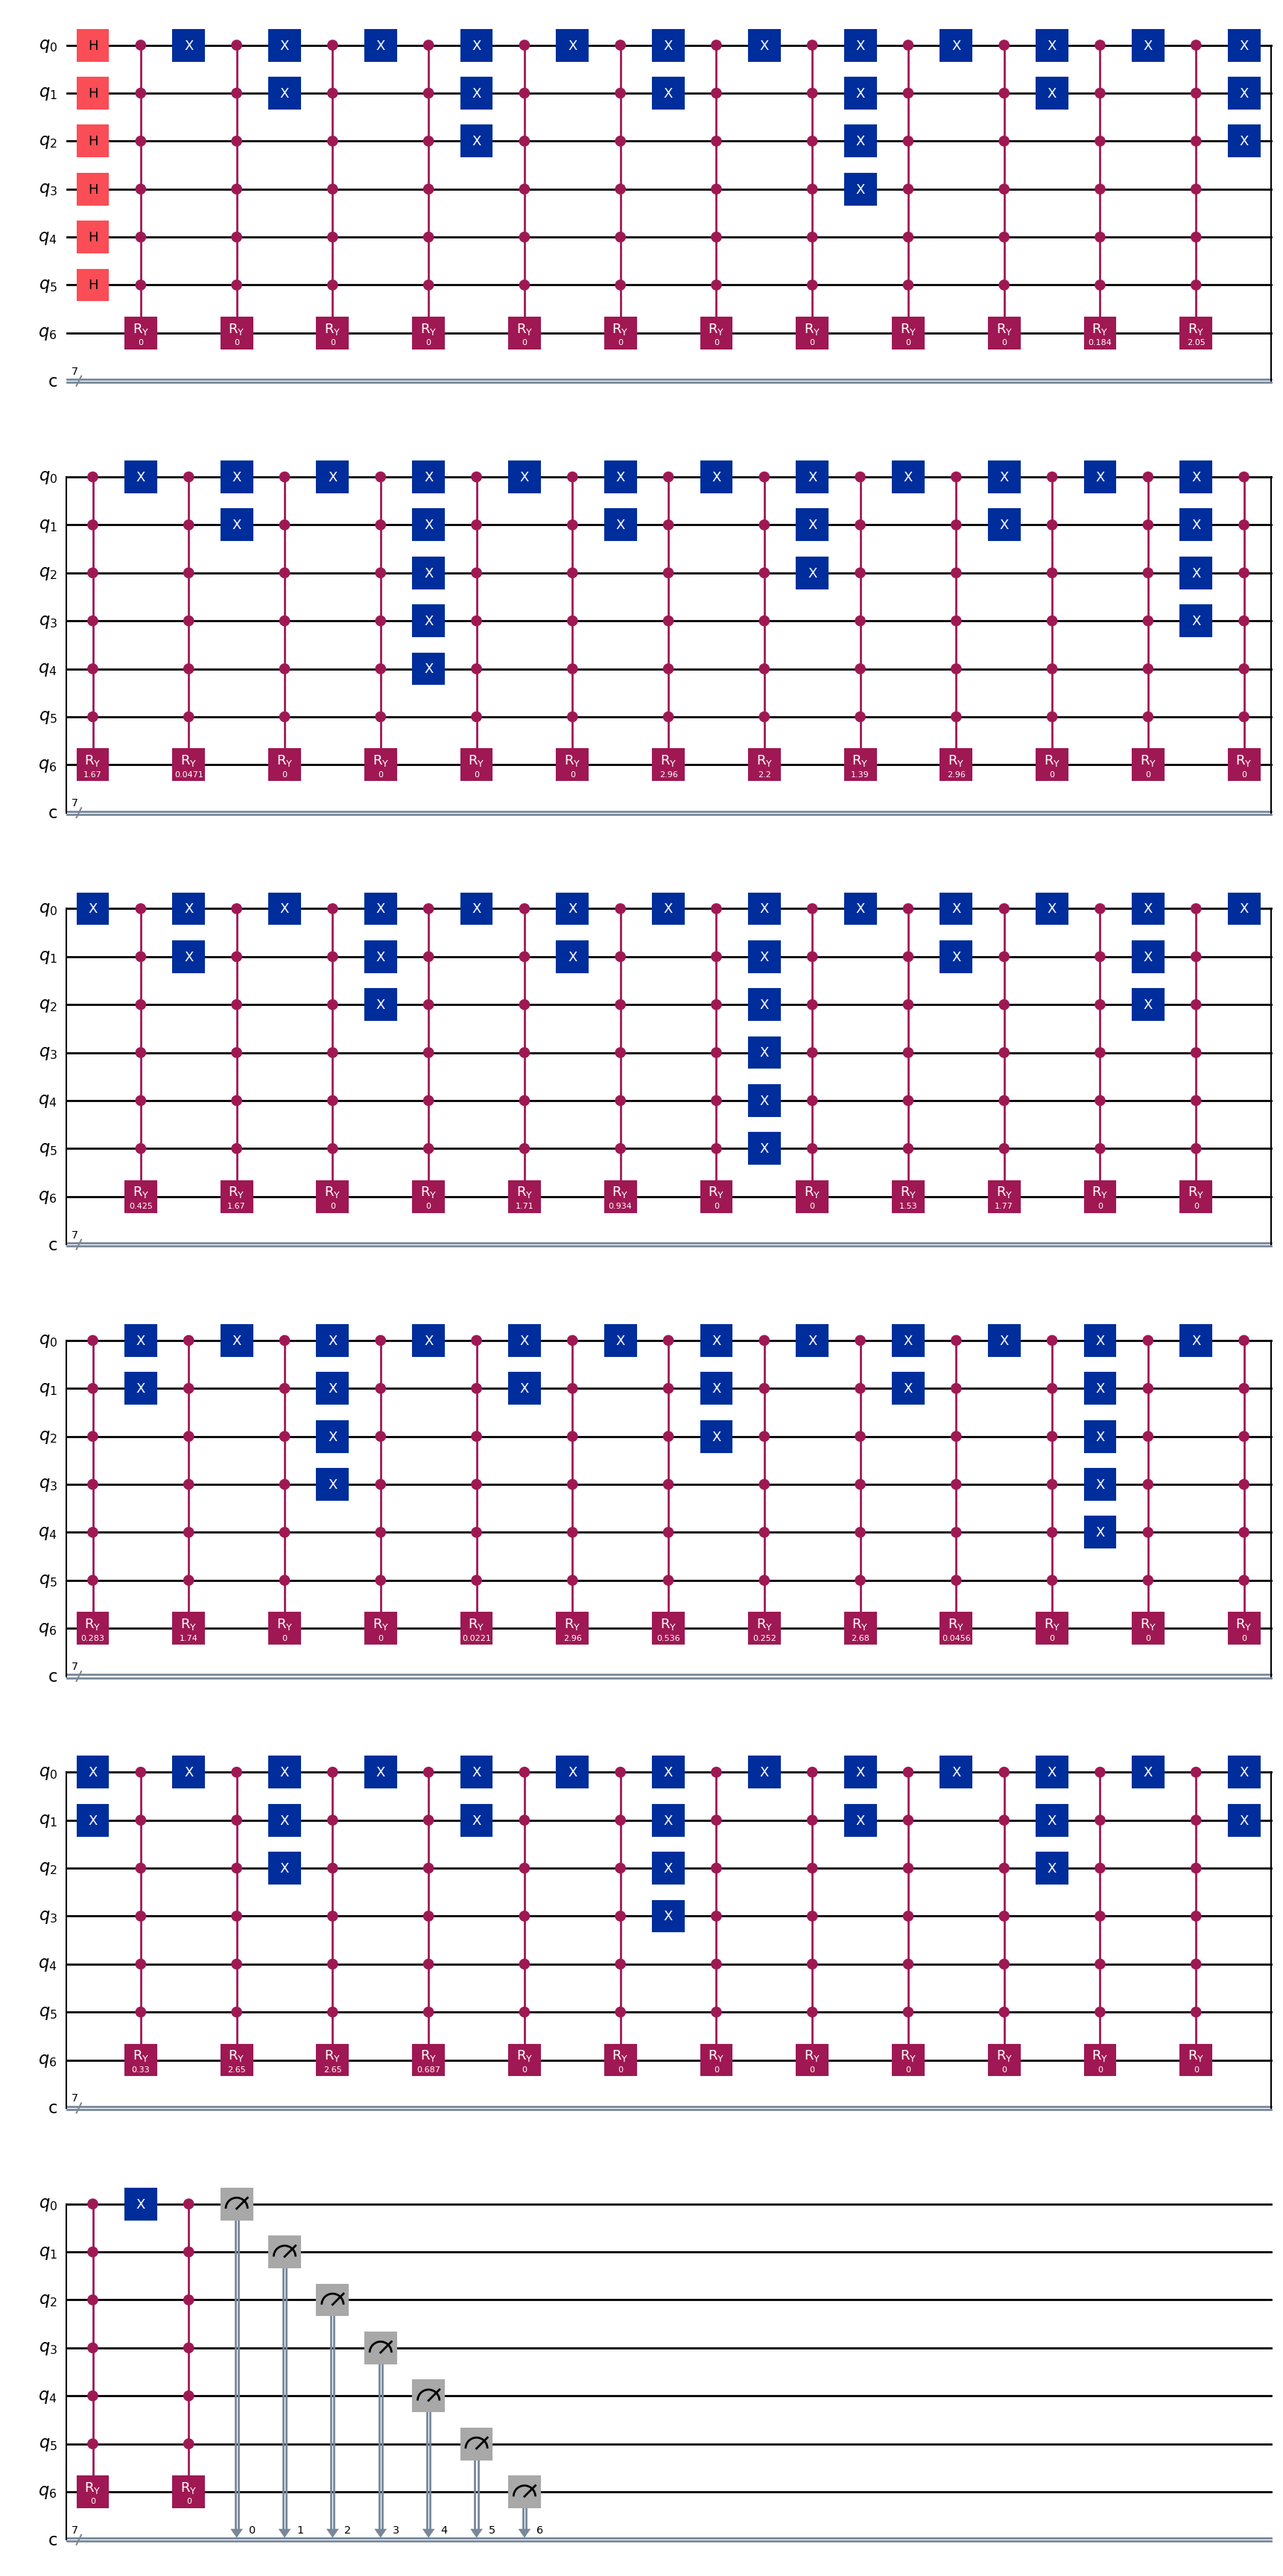

In [22]:
# Build and display the FRQI circuit
qc = build_circuit(angles)
qc.draw('mpl')  # This will show the circuit diagram if matplotlib is set up

In [ ]:
# Simulate the circuit
simulator = AerSimulator()
t_qc = transpile(qc, simulator, optimization_level=0)
result = simulator.run(t_qc, shots=shots).result()
counts = result.get_counts()

In [ ]:
# Plot frequency vs pixel state
pixel_states = [int(k[1:], 2) for k in counts.keys()]
frequencies = list(counts.values())
plt.figure(figsize=(10, 4))
plt.bar(pixel_states, frequencies, color='royalblue')
plt.xlabel('Pixel State (0-63)')
plt.ylabel('Frequency')
plt.title('Frequency vs Pixel State (FRQI Output)')
plt.tight_layout()
plt.show()